In [10]:
import pymc as pm
import netCDF4 as nc
import numpy as np
import aesara
import aesara.tensor as at
import arviz as az
import matplotlib.pyplot as plt

reshape = lambda x: x.reshape(tuple([x.shape[0]*x.shape[1]] + list(x.shape[2:])))

In [3]:
result = az.from_netcdf('GW150914.nc')

In [23]:
Qs = reshape(result.posterior['Q_charge'].values)
chis = reshape(result.posterior['chi'].values)
points = np.array([chis, Qs]).T

In [25]:
def axplot_rtheta(ax,points, gridsize=20, **kwargs):
    ax.hexbin(points[:,0],points[:,1],gridsize=gridsize, extent=(0,1,0,np.pi/2), **kwargs)
    return ax

def axplot_chiQ(ax,points, gridsize=20, labels=[r"$\chi$", r"$Q$"], **kwargs):
    ax.hexbin(points[:,0],points[:,1],gridsize=gridsize, extent=(0,1,0,1), **kwargs)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
    ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
    return ax

array([[<AxesSubplot:title={'center':'chi'}>,
        <AxesSubplot:title={'center':'chi'}>],
       [<AxesSubplot:title={'center':'Q_charge'}>,
        <AxesSubplot:title={'center':'Q_charge'}>]], dtype=object)

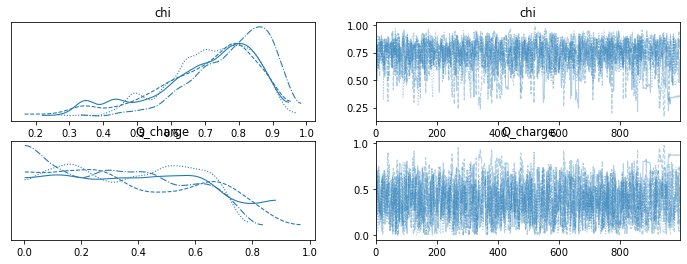

In [30]:
az.plot_trace(result, ['chi','Q_charge'])

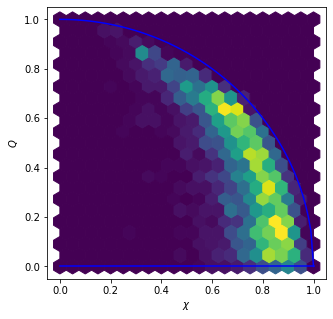

In [28]:
fig, ax = plt.subplots(1, figsize=(5,5))

ax = axplot_chiQ(ax, points)

plt.show()